# Tabular-playground-series-nov-2022

<br>

## Details of competition
#### URL: https://www.kaggle.com/competitions/tabular-playground-series-nov-2022/overview

<br>

#### Topic
Provide a fun and approachable-for-anyone tabular dataset to model.

<br>

#### Background

<br>

##### About the Tabular Playground Series
Kaggle competitions are incredibly fun and rewarding, but they can also be intimidating for people who are relatively new in their data science journey. In the past, we've launched many Playground competitions that are more approachable than our Featured competitions and thus, more beginner-friendly.

<br>

**The goal of these competitions is to provide a fun and approachable-for-anyone tabular dataset to model.** These competitions are a great choice for people looking for something in between the Titanic Getting Started competition and the Featured competitions. If you're an established competitions master or grandmaster, these probably won't be much of a challenge for you; thus, we encourage you to avoid saturating the leaderboard.

<br>

For each monthly competition, we'll be offering Kaggle Merchandise for the top three teams. And finally, because we want these competitions to be more about learning, we're limiting team sizes to 3 individuals.

### 

## 한 줄 요약!!

<br>

- **준비된 뒷토막 + 프로젝트 진행(앙상블 + 블랜딩)하는 앞토막 >> 모델 향상 >> 결과 제출**

## Files 항목

### submission_files/

- 앞 반토막에 대한 이진 분류 모델 예측값 파일 모음

<br>

### train_labels.csv

- 제출 파일에 대한 앞 반토막 실측값


<br>


### sample_submission.csv

- 뒷토막만 정상 데이터인 샘플 제출 파일


- 포맷(ids)은 정상임


- 점수 향상을 위해, 앞 반토막에 대해 추가 작업 진행 (데이터 섞기)




### 

## 데이터 관련 이해사항:

<br>

### submission_files(folder)
- 이진 분류 작업에 대한 예측값들이 저장


- 각 파일 이름은 로그 손실(logloss) 점수


- 실측 라벨 파일(train_label?)의 예측 행의 절반에 대한 로그 손실 점수가 파일 제목


- 훌륭한 트레이닝 세트가 됨

<br>

### train_labels.csv

- submission_files의 파일의 행에 대한 실측 정보값 제공


<br>


### sample_submission.csv

- 이해가 어느정도 된 부분!

- 나머지 뒷부분 반토막(20000~39999)에 대한 결과 예측을 제출!!

### 

## 우리의 목표

- 앙상블 활용!


- 다양한 submission file들의 앙상블을 통해, 모델 예측 성능을 높이는 것!!


- submission_files(반토막짜리 행에 대한 실측값들)들이 있으므로 블랜딩(여러 데이터를 합쳐서)하면 더 좋은 결과를 얻었는지 아닌지 알 수 있을 것임!!

<br>

### 요약

1. 두 파일을 합쳐서 반토막 데이터에 대한 점수(예측값)를 확인할 수 있음!!


2. 점수를 계속해서 개선해나갈 수 있음!!


3. 점수를 (극한으로) 개선 후, 나머지 행들에 대해, 리더보드에 제출할 수 있음!! 🥸



<br>

In [1]:
# import data
# !ls
!ls ./tabular-playground-series-nov-2022/

sample_submission.csv submission_files      train_labels.csv


In [2]:
import pandas as pd

In [3]:
# import data
sample_submission = pd.read_csv('./tabular-playground-series-nov-2022/sample_submission.csv')
sample_submission

,id,pred
0,20000,0.640707
1,20001,0.636904
2,20002,0.392496
3,20003,0.588658
4,20004,0.783603
...,...,...
19995,39995,0.382515
19996,39996,0.352498
19997,39997,0.577554
19998,39998,0.712353


In [4]:
# import data
train_labels = pd.read_csv('./tabular-playground-series-nov-2022/train_labels.csv')
train_labels

,id,label
0,0,0
1,1,1
2,2,1
3,3,1
4,4,0
...,...,...
19995,19995,1
19996,19996,1
19997,19997,0
19998,19998,0


In [5]:
# import data
_6222863195 = pd.read_csv('./tabular-playground-series-nov-2022/submission_files/0.6222863195.csv')
_6222863195

,id,pred
0,0,0.709336
1,1,0.452988
2,2,0.675462
3,3,0.481046
4,4,0.957339
...,...,...
39995,39995,0.382515
39996,39996,0.352498
39997,39997,0.577554
39998,39998,0.712353


### 

## Cloning

<br>

### Reference: 
- https://www.kaggle.com/code/hasanbasriakcay/tpsnov22-pseudo-labels-lgbm-xgb-lb-0-514

<br>

## Introduction

<br>

In [6]:
# import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import warnings
import datetime as dt
import math
from tqdm.auto import tqdm
import glob

from scipy.stats.mstats import gmean
from scipy.stats import hmean
from scipy.stats import spearmanr

np.random.seed(0)
warnings.simplefilter("ignore")

VAR_TH = 1.0e-03
PSEUDO_NFOLDS = 5
PSEUDO_TH = 0.94
CLIP = True
VAR_SMOOTHING = 1818

In [7]:
!ls

LightAutoML_submission+prev_best.csv
LightAutoML_submission.csv
sub_baseline.csv
sub_baseline_pseudo.csv
sub_lgbm_pseudo.csv
submission_pred_stacked_scipy_blended2.csv
tabular-playground-series-nov-2022
tabular-playground-series-nov-2022.zip
tabular_playground_series_nov_2022.ipynb
train.ftr
train.ftr.zip
train_pseudo2.ftr


In [8]:
data = pd.read_feather('./train.ftr')
sub = pd.read_csv('./tabular-playground-series-nov-2022/sample_submission.csv')
y = pd.read_csv('./tabular-playground-series-nov-2022/train_labels.csv')

train = data.loc[:19999, :]
test = data.loc[20000:, :]

display(train.head())
display(sub.head())

,sub_0,sub_1,sub_2,sub_3,sub_4,sub_5,sub_6,sub_7,sub_8,sub_9,...,sub_4990,sub_4991,sub_4992,sub_4993,sub_4994,sub_4995,sub_4996,sub_4997,sub_4998,sub_4999
0,0.709336,0.799007,0.851891,0.537158,0.623930,0.705970,0.503437,0.633185,0.641550,0.666604,...,0.769207,0.750250,0.663370,0.739333,0.822384,0.749498,0.729800,0.867847,0.745888,0.787
1,0.452988,0.364453,0.567582,0.354468,0.513818,0.584119,0.454809,0.238501,0.472171,0.522314,...,0.640052,0.794052,0.721298,0.804369,0.620626,0.733606,0.816942,0.814229,0.598331,0.547
2,0.675462,0.842260,0.800013,0.525229,0.692071,0.715418,0.651008,0.609124,0.691198,0.609994,...,0.812841,0.779859,0.865657,0.828493,0.763010,0.802883,0.806891,0.896058,0.855776,0.667
3,0.481046,0.577118,0.683032,0.541356,0.630088,0.664514,0.413373,0.508210,0.526140,0.584565,...,0.824703,0.799698,0.800130,0.716604,0.603779,0.708499,0.844837,0.853057,0.850657,0.622
4,0.957339,0.910337,0.917322,0.874487,0.787595,0.854273,0.843846,0.876749,0.821128,0.913054,...,0.934803,0.900150,0.960911,0.906037,0.961240,0.935608,0.889757,0.978505,0.953681,0.934


,id,pred
0,20000,0.640707
1,20001,0.636904
2,20002,0.392496
3,20003,0.588658
4,20004,0.783603


In [9]:
print("train shape:", train.shape)
print("test shape:", test.shape)
print("sub shape:", sub.shape)

train shape: (20000, 5000)
test shape: (20000, 5000)
sub shape: (20000, 2)


In [10]:
print("train nan value sum:", train.isna().sum().sum())
print("test nan value sum:", test.isna().sum().sum())

train nan value sum: 0
test nan value sum: 0


In [11]:
print("train dublicated value sum:", train.duplicated().sum().sum())
print("test dublicated value sum:", test.duplicated().sum().sum())

train dublicated value sum: 0
test dublicated value sum: 0


<br>

## Preprocesses

<br>

In [12]:
normalized_train = (train - train.mean()) / train.std()
normalized_train.var().sort_values()

sub_1825    4.930627e-32
sub_2356    1.000000e+00
sub_4963    1.000000e+00
sub_1691    1.000000e+00
sub_1685    1.000000e+00
                ...     
sub_3226    1.000000e+00
sub_2618    1.000000e+00
sub_684     1.000000e+00
sub_1148    1.000000e+00
sub_1824             NaN
Length: 5000, dtype: float64

In [13]:
for feature in ["sub_1824", "sub_1825"]:
    print(f"train {feature} unique : {train[feature].unique()}")
    print(f"test {feature} unique : {test[feature].unique()}")

train sub_1824 unique : [0.491104]
test sub_1824 unique : [0.491104]
train sub_1825 unique : [0.51]
test sub_1825 unique : [0.51]


In [14]:
train.max().max(), train.min().min()

(1.356611, -0.336521)

In [15]:
if CLIP:
    train = train.clip(0,1)
    test = test.clip(0,1)
    print(train.max().max(), train.min().min())

1.0 0.0


<br>

## Feature Selection

<br>

In [16]:
sub_file_names = sorted(glob.glob('./tabular-playground-series-nov-2022/submission_files/*.csv'))
scores_all = [float(file_name.split('/')[-1][:-4]) for file_name in sub_file_names]
print("sub_file_names len:", len(sub_file_names))

# ref: https://www.kaggle.com/code/takanashihumbert/drop-4000-features-lb-0-51530
best = 'sub_0'
else_cols = [f for f in data.columns if f != best]
drop_cols = []
for col, score in tqdm(zip(else_cols, scores_all)):
    logloss = score
    r, _ = spearmanr(data[best].values, data[col].values)
    if r > 0.98 or logloss > 0.680:
        drop_cols.append(col)

del data
gc.collect()

sub_file_names len: 5000


0it [00:00, ?it/s]

23

In [17]:
train.drop(drop_cols, axis=1, inplace=True)
print("train.shape:", train.shape)

train.shape: (20000, 630)


<br>

## UMAP-PCA Visualization

<br>

In [18]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import log_loss
import umap

embedding = umap.UMAP(n_neighbors=50,
                      min_dist=0.5,
                      metric='manhattan').fit_transform(train)

In [19]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

pca = PCA().fit(train)
print(pca.explained_variance_ratio_.cumsum()[:10])

[0.89218954 0.92142222 0.93283852 0.93762131 0.94151562 0.94479409
 0.94719723 0.94956768 0.9516112  0.95322088]


<br>

## Adding Pseudo Labels

<br>

In [20]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

In [21]:
def get_pseudo_data():
    skf = StratifiedKFold(n_splits=PSEUDO_NFOLDS, random_state=0, shuffle=True)
    oof = np.zeros(train.shape[0])
    test_preds = np.zeros(test.shape[0])
    for train_index, val_index in skf.split(train, y["label"]):
        X_train, X_val = train.loc[train_index,:], train.loc[val_index,:]
        y_train, y_val = y.loc[train_index,"label"], y.loc[val_index,"label"]
        X_test = test[X_train.columns.tolist()]
        
        '''
        # Drop Low Variances
        sel = VarianceThreshold(threshold=VAR_TH)
        sel.fit(X_train / X_train.mean())
        mask = sel.get_support()

        X_train = X_train.loc[:, mask]
        X_val = X_val.loc[:, mask]
        X_test = test.loc[:, mask]
        '''

        #model = QuadraticDiscriminantAnalysis(reg_param=reg_param)
        model = LinearDiscriminantAnalysis()
        model.fit(X_train, y_train)
        val_pred = model.predict_proba(X_val)[:,1]
        test_pred = model.predict_proba(X_test)[:,1]

        oof[val_index] = val_pred
        test_preds += test_pred

        del X_train, X_val, X_test, y_train, y_val, model
        gc.collect()
    test_preds /= PSEUDO_NFOLDS
    return oof, test_preds

In [22]:
val_preds, test_preds = get_pseudo_data()

score=0.5507181301818095


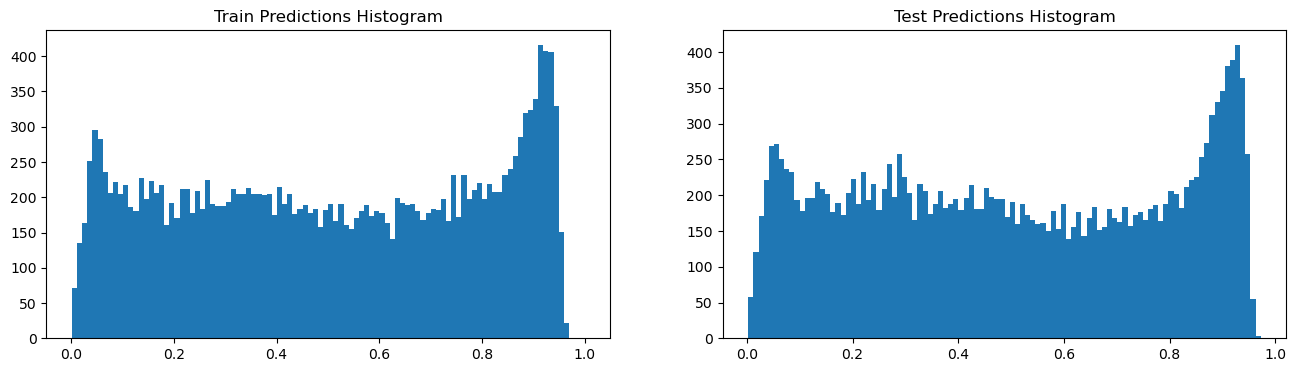

In [23]:
## LinearDiscriminantAnalysis()
print(f"score={log_loss(y['label'], val_preds)}")
fig, axes = plt.subplots(1, 2, figsize=(16,4))
axes[0].hist(val_preds, bins=100);
axes[0].set_title("Train Predictions Histogram")
axes[1].hist(test_preds, bins=100);
axes[1].set_title("Test Predictions Histogram");
plt.show()

proba_th: 0.98722


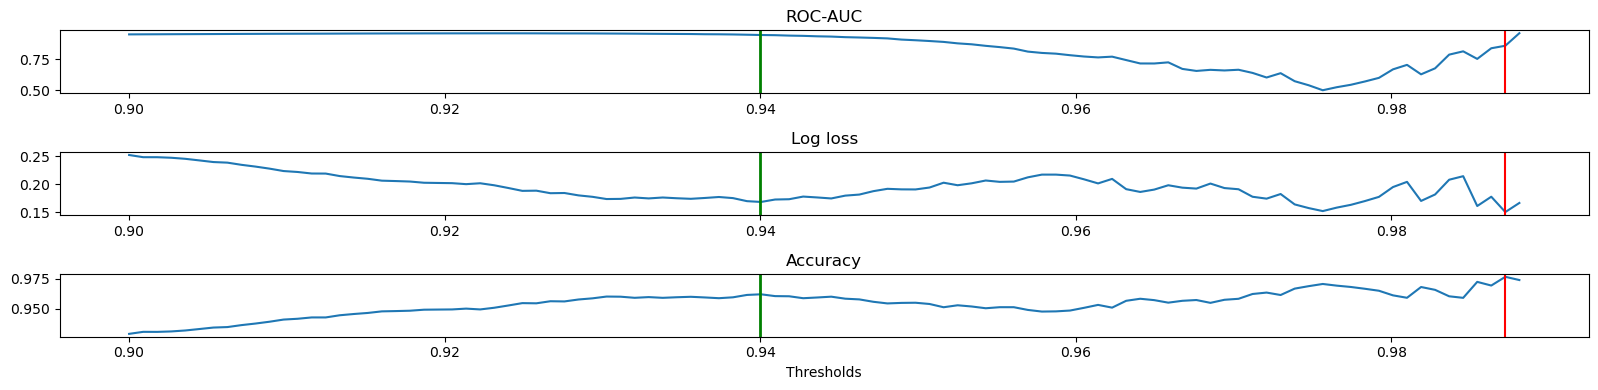

In [24]:
th_list = np.linspace(0.9, 0.989, 100, endpoint=False)
scores_roc, score_log, score_acc = [], [], []
proba_th, max_score, min_score = 0, 0, 99
for th in th_list:
    condition = ((val_preds >= th) | (val_preds <= 1-th))
    new_val_preds = val_preds[condition]
    new_val_true = y.loc[condition, 'label']
    score = roc_auc_score(new_val_true, new_val_preds)
    scores_roc.append(score)
    score = log_loss(new_val_true, new_val_preds)
    score_log.append(score)
    if score < min_score:
        min_score = score
        proba_th = th
    score = accuracy_score(new_val_true, new_val_preds.round().astype(int))
    score_acc.append(score)
print("proba_th:", proba_th)
fig, axes = plt.subplots(3, figsize=(16,4))
axes[0].plot(th_list, scores_roc);
axes[0].axvline(proba_th, color='r')
axes[0].set_title("ROC-AUC")
axes[0].axvline(PSEUDO_TH, color='green', linewidth=2)
axes[1].plot(th_list, score_log);
axes[1].axvline(proba_th, color='r')
axes[1].set_title("Log loss")
axes[1].axvline(PSEUDO_TH, color='green', linewidth=2)
axes[2].plot(th_list, score_acc);
axes[2].axvline(proba_th, color='r');
axes[2].axvline(PSEUDO_TH, color='green', linewidth=2);
axes[2].set_xlabel("Thresholds");
axes[2].set_title("Accuracy");
fig.tight_layout()

In [25]:
df_2d = pd.DataFrame()
df_2d["sub_0"] = train["sub_0"].values
df_2d["sub_1"] = train["sub_1"].values

df_2d["pseudo"] = 0
df_2d.loc[val_preds >= PSEUDO_TH, "pseudo"] = 1
df_2d.loc[val_preds <= 1-PSEUDO_TH, "pseudo"] = -1

df_2d["pseudo_color"] = "grey"
df_2d.loc[val_preds >= PSEUDO_TH, "pseudo_color"] = "blue"
df_2d.loc[val_preds <= 1-PSEUDO_TH, "pseudo_color"] = "blue"

print("Pseudo Label Counts")
df_2d["pseudo"].value_counts()

Pseudo Label Counts


 0    18338
-1     1166
 1      496
Name: pseudo, dtype: int64

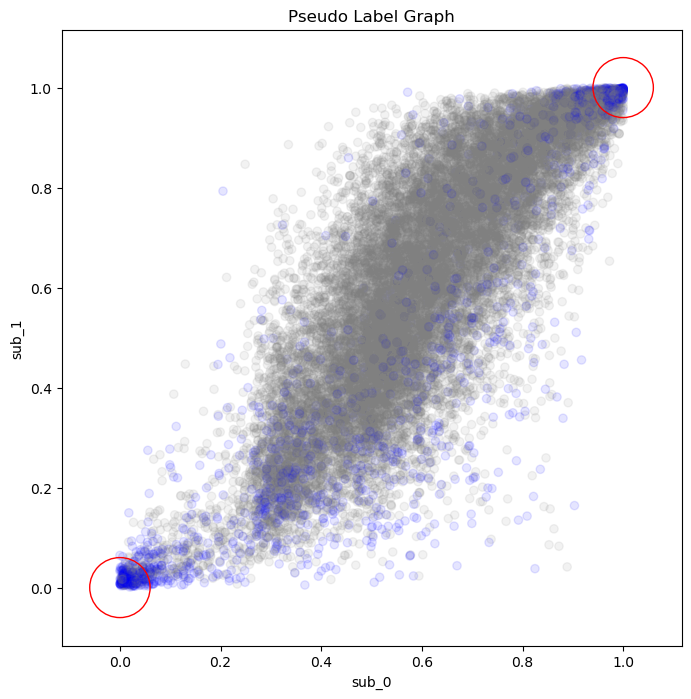

In [26]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(df_2d["sub_0"], df_2d["sub_1"], color=df_2d["pseudo_color"], alpha=0.1)
ax.set_ylabel("sub_1")
ax.set_xlabel("sub_0")
ax.set_title("Pseudo Label Graph")
ax.add_patch(plt.Circle((0, 0), 1-PSEUDO_TH, color='r', fill=False, clip_on=True))
ax.add_patch(plt.Circle((1, 1), 1-PSEUDO_TH, color='r', fill=False, clip_on=True));

In [27]:
condition = ((test_preds >= PSEUDO_TH) | (test_preds <= 1-PSEUDO_TH))
train_pseudo = test.loc[condition, :]
train_pseudo['label'] = test_preds[condition].round().astype(int)
train_pseudo.reset_index(inplace=True, drop=True)
train_pseudo.to_feather("train_pseudo2.ftr")

In [28]:
print("train_pseudo.shape:", train_pseudo.shape)
train_pseudo.head()

train_pseudo.shape: (1516, 5001)


,sub_0,sub_1,sub_2,sub_3,sub_4,sub_5,sub_6,sub_7,sub_8,sub_9,...,sub_4991,sub_4992,sub_4993,sub_4994,sub_4995,sub_4996,sub_4997,sub_4998,sub_4999,label
0,0.510769,0.121118,0.161728,0.261205,0.512481,0.165255,0.310519,0.317874,0.540633,0.531018,...,0.428416,0.380975,0.545106,0.157013,0.407532,0.574039,0.565794,0.572804,0.501,0
1,0.361320,0.347783,0.055087,0.508180,0.511239,0.414870,0.386703,0.374178,0.421939,0.470217,...,0.628393,0.552348,0.603726,0.596260,0.625424,0.565772,0.307316,0.591384,0.141,0
2,0.671001,0.286648,0.246030,0.249671,0.599813,0.524274,0.349856,0.162366,0.546364,0.564960,...,0.621725,0.607564,0.716344,0.613170,0.681448,0.618902,0.456893,0.739265,0.351,0
3,0.918708,0.969526,0.994842,0.941859,0.803327,0.874479,0.934235,0.921584,0.822495,0.957115,...,0.903667,0.981070,0.970359,0.976426,0.984603,0.872210,0.980073,0.920242,0.683,1
4,0.404788,0.212052,0.622353,0.312842,0.548978,0.432661,0.572896,0.176530,0.604128,0.331153,...,0.613486,0.645798,0.512526,0.535430,0.502873,0.726607,0.698740,0.678254,0.651,0


<br>

## Baseline Modeling

<br>

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import lightgbm as lgb
import xgboost as xgb

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

In [30]:
data = pd.read_feather('./train.ftr')
sub = pd.read_csv('./tabular-playground-series-nov-2022/sample_submission.csv')
y = pd.read_csv("./tabular-playground-series-nov-2022/train_labels.csv")

train = data.loc[:19999, :]
test = data.loc[20000:, :]

# Add pseudo labeled dataset
train_pseudo = pd.read_feather("./train_pseudo2.ftr")
train["label"] = y["label"].values
train_new = pd.concat([train, train_pseudo])

print("train_new.shape:", train_new.shape)
train_new.head()

train_new.shape: (21516, 5001)


,sub_0,sub_1,sub_2,sub_3,sub_4,sub_5,sub_6,sub_7,sub_8,sub_9,...,sub_4991,sub_4992,sub_4993,sub_4994,sub_4995,sub_4996,sub_4997,sub_4998,sub_4999,label
0,0.709336,0.799007,0.851891,0.537158,0.623930,0.705970,0.503437,0.633185,0.641550,0.666604,...,0.750250,0.663370,0.739333,0.822384,0.749498,0.729800,0.867847,0.745888,0.787,0
1,0.452988,0.364453,0.567582,0.354468,0.513818,0.584119,0.454809,0.238501,0.472171,0.522314,...,0.794052,0.721298,0.804369,0.620626,0.733606,0.816942,0.814229,0.598331,0.547,1
2,0.675462,0.842260,0.800013,0.525229,0.692071,0.715418,0.651008,0.609124,0.691198,0.609994,...,0.779859,0.865657,0.828493,0.763010,0.802883,0.806891,0.896058,0.855776,0.667,1
3,0.481046,0.577118,0.683032,0.541356,0.630088,0.664514,0.413373,0.508210,0.526140,0.584565,...,0.799698,0.800130,0.716604,0.603779,0.708499,0.844837,0.853057,0.850657,0.622,1
4,0.957339,0.910337,0.917322,0.874487,0.787595,0.854273,0.843846,0.876749,0.821128,0.913054,...,0.900150,0.960911,0.906037,0.961240,0.935608,0.889757,0.978505,0.953681,0.934,0


In [31]:
train_new.drop(drop_cols, axis=1, inplace=True)
train.drop(drop_cols, axis=1, inplace=True)
test.drop(drop_cols, axis=1, inplace=True)
print("train_new.shape:", train_new.shape)

train_new.shape: (21516, 631)


In [32]:
model_lr = LogisticRegression().fit(train.drop("label", axis=1), train["label"])
preds = model_lr.predict_proba(test)[:,1]
sub["pred"] = preds
sub.to_csv("sub_baseline.csv", index=False)

In [33]:
model_lr_p = LogisticRegression().fit(train_new.drop("label", axis=1), train_new["label"])
preds_p = model_lr_p.predict_proba(test)[:,1]
sub["pred"] = preds_p
sub.to_csv("sub_baseline_pseudo.csv", index=False)

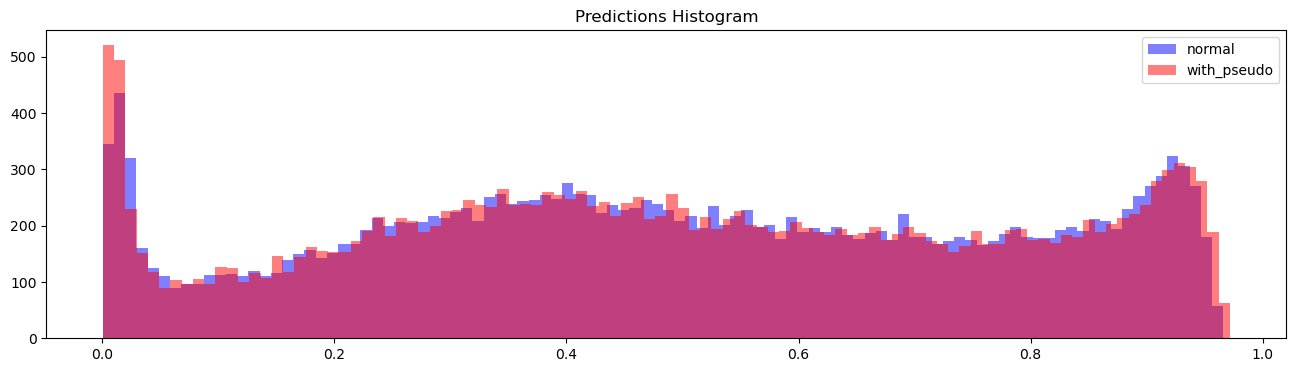

In [34]:
fig, ax = plt.subplots(figsize=(16, 4))
ax.hist(preds, bins=100, alpha=0.5, color='b', label='normal')
ax.hist(preds_p, bins=100, alpha=0.5, color='r', label='with_pseudo')
ax.set_title("Predictions Histogram");
ax.legend();

In [35]:
details = {
    "model" : ["lr_normal", "lr_pseudo"],
    "LB" : [0.53931, 0.53893]
}
df_scores = pd.DataFrame(details)
df_scores

,model,LB
0,lr_normal,0.53931
1,lr_pseudo,0.53893


<br>

## Modeling

<br>

In [36]:
def add_umap_features(X_train, y_train, X_val, X_test, nfolds=5):
    skf = StratifiedKFold(n_splits=nfolds, random_state=0, shuffle=True)
    umap_train = np.zeros((X_train.shape[0], 2))
    umap_valid = np.zeros((X_val.shape[0], 2))
    umap_test = np.zeros((X_test.shape[0], 2))
    for fold, (train_index, valid_index) in enumerate(skf.split(X_train.to_numpy(), y_train.to_numpy())):
        X_temp_train, y_temp_train = X_train.to_numpy()[train_index,:], y_train.to_numpy()[train_index,:]
        X_temp_valid, y_temp_valid = X_train.to_numpy()[valid_index,:], y_train.to_numpy()[valid_index,:]
        
        model_umap = umap.UMAP(n_neighbors=50, min_dist=0.5, metric='manhattan').fit(X_temp_train, y_temp_train)
        temp_val_preds = model_umap.transform(X_temp_valid)
        val_preds = model_umap.transform(X_val)
        test_preds = model_umap.transform(X_test)
        
        umap_train[valid_index, :] = temp_val_preds
        umap_valid[:, :] += val_preds / nfolds
        umap_test[:, :] += test_preds / nfolds
    
    return umap_train, umap_valid, umap_test

def add_pca_features(X_train, y_train, X_val, X_test, nfolds=5, n_components=4):
    skf = StratifiedKFold(n_splits=nfolds, random_state=0, shuffle=True)
    pca_train = np.zeros((X_train.shape[0], n_components))
    pca_valid = np.zeros((X_val.shape[0], n_components))
    pca_test = np.zeros((X_test.shape[0], n_components))
    for fold, (train_index, valid_index) in enumerate(skf.split(X_train.to_numpy(), y_train.to_numpy())):
        X_temp_train, y_temp_train = X_train.to_numpy()[train_index,:], y_train.to_numpy()[train_index,:]
        X_temp_valid, y_temp_valid = X_train.to_numpy()[valid_index,:], y_train.to_numpy()[valid_index,:]
        
        model_pca = PCA(n_components=n_components, random_state=42).fit(X_temp_train, y_temp_train)
        temp_val_preds = model_pca.transform(X_temp_valid)
        val_preds = model_pca.transform(X_val)
        test_preds = model_pca.transform(X_test)
        
        pca_train[valid_index, :] = temp_val_preds
        pca_valid[:, :] += val_preds / nfolds
        pca_test[:, :] += test_preds / nfolds
    
    return pca_train, pca_valid, pca_test

#umap_train, umap_valid, umap_test = add_umap_features(X, y, X_test, X_test)

In [37]:
X = train_new.drop("label", axis=1).reset_index(drop=True)
y = train_new[["label"]].reset_index(drop=True)
X_test = test

### LGBM

In [38]:
# LGBM
def get_lgbm_preds(X, y, X_test_ori, nfold=5, params_lgb={}):
    skf = StratifiedKFold(n_splits=nfold, random_state=0, shuffle=True)
    oof = np.zeros(X.shape[0])
    test_preds = np.zeros((X_test_ori.shape[0], nfold))
    for fold, (train_index, val_index) in enumerate(skf.split(X, y)):
        print("\nFold {}".format(fold+1))
        X_train, y_train = X.loc[train_index,:], y.loc[train_index,:]
        X_val, y_val = X.loc[val_index,:], y.loc[val_index,:]
        X_test = X_test_ori.copy()
        
        #Adding PCA Features
        pca_train, pca_valid, pca_test = add_pca_features(X_train, y_train, X_val, X_test, nfolds=5, n_components=4)
        for feature_index in range(pca_train.shape[1]):
            X_train[f"pca_{feature_index+1}"] = pca_train[:,feature_index]
            X_val[f"pca_{feature_index+1}"] = pca_valid[:,feature_index]
            X_test[f"pca_{feature_index+1}"] = pca_test[:,feature_index]
            
        dtrain = lgb.Dataset(X_train, y_train)
        dval = lgb.Dataset(X_val, y_val)
        
        evals_result = {}
        model = lgb.train(params=params_lgb, train_set=dtrain, valid_sets=[dval], num_boost_round=3000, 
                          early_stopping_rounds=50, verbose_eval=100, evals_result=evals_result)
        
        val_pred = model.predict(X_val)
        test_pred = model.predict(X_test)

        oof[val_index] = val_pred
        test_preds[:,fold] = test_pred

        del model, dtrain, dval, X_train, X_val, y_train, y_val
        gc.collect()
    test_preds = hmean(test_preds, axis=1)
    return oof, test_preds

### Hyperparameter Tuning

In [39]:
# Hyperparameter Tuning
import optuna

def objective(trial):
    params = {
        "objective": "binary",
        "metric": "binary_logloss",
        "learning_rate": 0.01,
        "max_depth":6,
        'random_state': 42,
        "n_jobs":-1,
        "seed":123,
        "verbose":-1,
        "num_leaves":trial.suggest_int('num_leaves', 10, 200, step=10),
        "min_data_in_leaf":trial.suggest_int('min_data_in_leaf', 10, 100, step=10),
        'lambda_l1': trial.suggest_float('alpha', 0.0001, 10.0),
        'lambda_l2': trial.suggest_float('lambda', 0.0001, 10.0),
        'subsample': trial.suggest_float('subsample', 0.2, 1.0, step=0.1),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.2, 1.0, step=0.1),
    }
    
    '''
    skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
    score_list = []
    for fold, (train_index, val_index) in enumerate(skf.split(X, y)):
        dtrain = lgb.Dataset(X.loc[train_index,:], y.loc[train_index,:])
        dval = lgb.Dataset(X.loc[val_index,:], y.loc[val_index,:])
        
        evals_result = {}
        model = lgb.train(params=params, train_set=dtrain, valid_sets=[dval], num_boost_round=1000, 
                          early_stopping_rounds=10, verbose_eval=0, evals_result=evals_result)
        score = evals_result['valid_0']["binary_logloss"][model.num_trees()-1]
        score_list.append(score)

        del model, dtrain, dval
        gc.collect()
    '''
    
    skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
    trainlist, validlist = [], []
    for train_index, val_index in skf.split(X, y):
        trainlist.append(train_index)
        validlist.append(val_index)
    folds = zip(trainlist, validlist)
    
    dataset = lgb.Dataset(X, y)
    res = lgb.cv(
        params, dataset, num_boost_round=1000, verbose_eval=0,
        early_stopping_rounds=10,
        folds=folds,
        stratified=False,
    )
    
    return res["binary_logloss-mean"][-1] + res["binary_logloss-stdv"][-1]

In [40]:
'''
# Base score = 0.4804388
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=493)
print('Number of finished trials: ', len(study.trials))
print('Best trial: ', study.best_trial.params)
print('Best value: ', study.best_value)
''';

In [41]:
params_lgb = {
    "objective": "binary",
    "metric": "binary_logloss",
    "learning_rate": 0.003,
    "max_depth":6,
    'random_state': 42,
    "n_jobs":-1,
    "seed":123,
    "verbose":-1,
    'num_leaves': 160, 
    'min_data_in_leaf': 10, 
    'alpha': 0.5091797271529079, 
    'lambda': 0.35380392843435005, 
    'subsample': 0.9000000000000001, 
    'feature_fraction': 0.4
}

lgbm_val_preds, lgbm_test_preds = get_lgbm_preds(X, y, X_test, nfold=13, params_lgb=params_lgb)


Fold 1
[LightGBM] [Warning] seed is set=123, random_state=42 will be ignored. Current value: seed=123
Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_logloss: 0.614259
[200]	valid_0's binary_logloss: 0.568163
[300]	valid_0's binary_logloss: 0.539536
[400]	valid_0's binary_logloss: 0.521285
[500]	valid_0's binary_logloss: 0.509746
[600]	valid_0's binary_logloss: 0.50235
[700]	valid_0's binary_logloss: 0.497526
[800]	valid_0's binary_logloss: 0.494339
[900]	valid_0's binary_logloss: 0.49243
[1000]	valid_0's binary_logloss: 0.491288
[1100]	valid_0's binary_logloss: 0.490592
[1200]	valid_0's binary_logloss: 0.490175
[1300]	valid_0's binary_logloss: 0.489967
[1400]	valid_0's binary_logloss: 0.489982
Early stopping, best iteration is:
[1360]	valid_0's binary_logloss: 0.489937

Fold 2
[LightGBM] [Warning] seed is set=123, random_state=42 will be ignored. Current value: seed=123
Training until validation scores don't improve for 50 rounds
[100]	valid_0's bi

Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_logloss: 0.616166
[200]	valid_0's binary_logloss: 0.5705
[300]	valid_0's binary_logloss: 0.541991
[400]	valid_0's binary_logloss: 0.52386
[500]	valid_0's binary_logloss: 0.51198
[600]	valid_0's binary_logloss: 0.504132
[700]	valid_0's binary_logloss: 0.499
[800]	valid_0's binary_logloss: 0.495346
[900]	valid_0's binary_logloss: 0.492944
[1000]	valid_0's binary_logloss: 0.491203
[1100]	valid_0's binary_logloss: 0.490159
[1200]	valid_0's binary_logloss: 0.489423
[1300]	valid_0's binary_logloss: 0.489009
[1400]	valid_0's binary_logloss: 0.488778
[1500]	valid_0's binary_logloss: 0.488665
Early stopping, best iteration is:
[1490]	valid_0's binary_logloss: 0.488627

Fold 11
[LightGBM] [Warning] seed is set=123, random_state=42 will be ignored. Current value: seed=123
Training until validation scores don't improve for 50 rounds
[100]	valid_0's binary_logloss: 0.61218
[200]	valid_0's binary_logloss: 0.564116
[3

score=0.4881290761434728


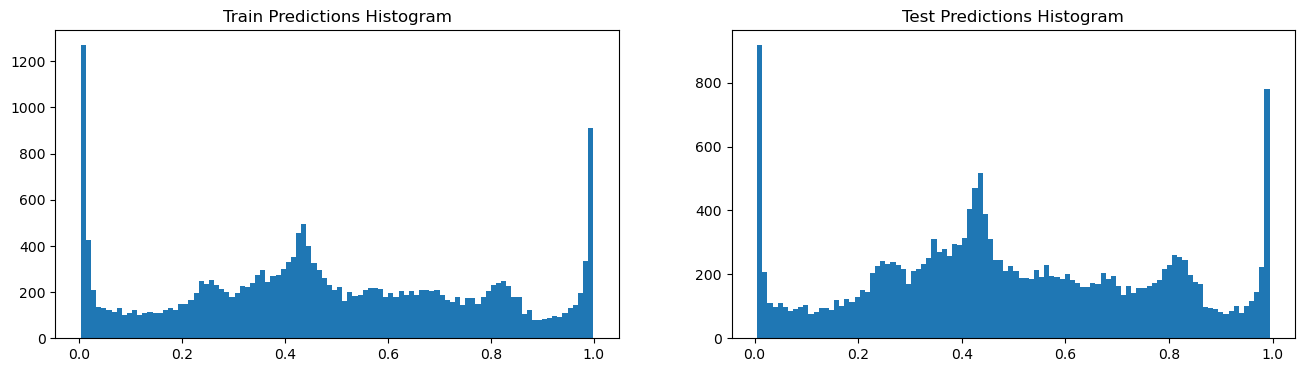

In [42]:
print(f"score={log_loss(y, lgbm_val_preds)}")
fig, axes = plt.subplots(1, 2, figsize=(16,4))
axes[0].hist(lgbm_val_preds, bins=100);
axes[0].set_title("Train Predictions Histogram")
axes[1].hist(lgbm_test_preds, bins=100);
axes[1].set_title("Test Predictions Histogram");
plt.show()

In [43]:
sub = pd.read_csv('./tabular-playground-series-nov-2022/sample_submission.csv')
sub["pred"] = lgbm_test_preds
sub.to_csv("sub_lgbm_pseudo.csv", index=False)

### XGB

In [44]:
def get_xgb_preds(X, y, X_test_ori, nfold=5, params_xgb={}):
    skf = StratifiedKFold(n_splits=nfold, random_state=0, shuffle=True)
    oof = np.zeros(X.shape[0])
    test_preds = np.zeros((X_test_ori.shape[0], nfold))
    for fold, (train_index, val_index) in enumerate(skf.split(X, y)):
        print("\nFold {}".format(fold+1))
        X_train, y_train = X.loc[train_index,:], y.loc[train_index,:]
        X_val, y_val = X.loc[val_index,:], y.loc[val_index,:]
        X_test = X_test_ori.copy()
        
        #Adding PCA Features
        pca_train, pca_valid, pca_test = add_pca_features(X_train, y_train, X_val, X_test, nfolds=5, n_components=4)
        for feature_index in range(pca_train.shape[1]):
            X_train[f"pca_{feature_index+1}"] = pca_train[:,feature_index]
            X_val[f"pca_{feature_index+1}"] = pca_valid[:,feature_index]
            X_test[f"pca_{feature_index+1}"] = pca_test[:,feature_index]
        
        dtrain = xgb.DMatrix(X_train, label=y_train)
        dval = xgb.DMatrix(X_val, label=y_val)
        
        evals_result = {}
        model = xgb.train(params=params_xgb, dtrain=dtrain, evals=[(dval, "eval")], num_boost_round=3000, 
                          early_stopping_rounds=50, verbose_eval=100, evals_result=evals_result)
        
        val_pred = model.predict(dval)
        test_pred = model.predict(xgb.DMatrix(X_test))

        oof[val_index] = val_pred
        test_preds[:,fold] = test_pred

        del model, dtrain, dval, X_train, X_val, y_train, y_val
        gc.collect()
    test_preds = hmean(test_preds, axis=1)
    return oof, test_preds

In [45]:
params_xgb = {
    "objective":"binary:logistic",
    "eval_metric": "logloss",
    "learning_rate": 0.003,
    "max_depth":6,
    'random_state': 42,
    "n_jobs":-1,
    "seed":123,
    "tree_method":"gpu_hist",
    'alpha': 0.5091797271529079, 
    'lambda': 0.35380392843435005, 
    'subsample': 0.9, 
    'colsample_bytree': 0.4
}

xgb_val_preds, xgb_test_preds = get_xgb_preds(X, y, X_test, nfold=13, params_xgb=params_xgb)


Fold 1


XGBoostError: [04:06:06] /Users/runner/miniforge3/conda-bld/xgboost-split_1665562906201/work/src/gbm/../common/common.h:239: XGBoost version not compiled with GPU support.
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x0000000172f135b4 dmlc::LogMessageFatal::~LogMessageFatal() + 116
  [bt] (1) 2   libxgboost.dylib                    0x0000000172febf70 xgboost::gbm::GBTree::ConfigureUpdaters() + 608
  [bt] (2) 3   libxgboost.dylib                    0x0000000172fe662a xgboost::gbm::GBTree::Configure(std::__1::vector<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > >, std::__1::allocator<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > > > > const&) + 1114
  [bt] (3) 4   libxgboost.dylib                    0x000000017300936f xgboost::LearnerConfiguration::Configure() + 1327
  [bt] (4) 5   libxgboost.dylib                    0x0000000172f2a2f0 XGBoosterBoostedRounds + 112
  [bt] (5) 6   libffi.8.dylib                      0x000000010d181d92 ffi_call_unix64 + 82
  [bt] (6) 7   ???                                 0x00000003099a0670 0x0 + 13045991024



In [ ]:
print(f"score={log_loss(y, xgb_val_preds)}")
fig, axes = plt.subplots(1, 2, figsize=(16,4))
axes[0].hist(xgb_val_preds, bins=100);
axes[0].set_title("Train Predictions Histogram")
axes[1].hist(xgb_test_preds, bins=100);
axes[1].set_title("Test Predictions Histogram");
plt.show()

In [ ]:
sub = pd.read_csv('./tabular-playground-series-nov-2022/sample_submission.csv')
sub["pred"] = xgb_test_preds
sub.to_csv("sub_xgb_pseudo.csv", index=False)

## Mean Methods Comparisons
### Mean Methods Comparisons
- https://www.kaggle.com/code/hasanbasriakcay/tpsnov22-mean-methods-comparisons

In [ ]:
# notebook https://www.kaggle.com/code/mikhailkuz/lightautoml-nn-happiness/notebook?scriptVersionId=109952433
sub_mikhail_alexander = pd.read_csv("./LightAutoML_submission.csv")

# https://www.kaggle.com/code/sergiosaharovskiy/tps-nov-2022-in-automl-we-trust/notebook?scriptVersionId=110041978
sub_sergey = pd.read_csv("./LightAutoML_submission+prev_best.csv")

# https://www.kaggle.com/code/pourchot/stacking-with-scipy-minimize/notebook
sub_laurent = pd.read_csv("./submission_pred_stacked_scipy_blended2.csv")

fig, ax = plt.subplots(figsize=(16,4))
ax.hist(sub_mikhail_alexander["pred"], bins=100, alpha=0.33, label='Mikhail+Alexander')
ax.hist(sub_sergey["pred"], bins=100, alpha=0.33, label='Sergey')
ax.hist(sub_laurent["pred"], bins=100, alpha=0.33, label='Laurent')
ax.set_title("Predictions Histogram");
ax.legend(loc='best');

In [ ]:
final_gmean_pred = gmean([xgb_test_preds, lgbm_test_preds, sub_mikhail_alexander["pred"], sub_sergey["pred"], sub_laurent["pred"]], axis=0)
sub["pred"] = final_gmean_pred
sub.to_csv("sub_final_gmean_pseudo.csv", index=False)

final_hmean_pred = hmean([xgb_test_preds, lgbm_test_preds, sub_mikhail_alexander["pred"], sub_sergey["pred"], sub_laurent["pred"]], axis=0)
sub["pred"] = final_hmean_pred
sub.to_csv("sub_final_hmean_pseudo.csv", index=False)

fig, ax = plt.subplots(figsize=(16,4))
ax.hist(final_hmean_pred, bins=100, alpha=0.5, label='final_hmean');
ax.hist(final_gmean_pred, bins=100, alpha=0.5, label='final_gmean')
ax.set_title("Predictions Histogram");
ax.legend(loc='best');